Check the genes that M&P are interested in 

SHY2 (AT1G04240), AT2G21840 to AT2G21860, RAF43 (AT3G46930), MYB74 (AT4G05100), and EBF2 (AT5G25350).

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [12]:
gff = pd.read_csv('../ara_keyfiles/Araport11_GFF3_genes_transposons.current.gff',
           sep='\t', comment='#', header=None,encoding='latin1')

In [13]:
# Assign column names
gff.columns = ['seqid', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes']

# Split the 'attributes' column by semicolon
attributes_df = gff['attributes'].str.split(';', expand=True)

In [16]:
gff['gene'] = attributes_df[0]

In [26]:
genes_of_interest = ['AT1G04240', 'AT2G21840', 'AT2G21860', 'AT3G46930', 'AT4G05100', 'AT5G25350']

In [21]:
gff[(gff['type'] == 'gene')&(gff['gene'].str.contains('AT1G04240'))]

,seqid,source,type,start,end,score,strand,phase,attributes,gene
12914,Chr1,Araport11,gene,1128149,1129689,.,-,.,ID=AT1G04240;Name=AT1G04240;full_name=SHORT HY...,ID=AT1G04240


In [27]:
gene_coords = []

for gene_id in genes_of_interest:
    row = gff[(gff['type'] == 'gene') & (gff['gene'].str.contains(gene_id))]
    if not row.empty:
        chrom = row.iloc[0]['seqid']
        chrom_num = ''.join(filter(str.isdigit, chrom))  # Converts 'Chr1' -> '1'
        start = row.iloc[0]['start']
        end = row.iloc[0]['end']
        gene_coords.append({'gene_id': gene_id, 'chrom': int(chrom_num), 'start': start, 'end': end})
    else:
        print(f"Gene {gene_id} not found.")

gene_df = pd.DataFrame(gene_coords)

In [62]:
gene_df['length'] = gene_df['end'] - gene_df['start'] 

In [119]:
gene_df.to_csv('genes_df.csv',index=None)

In [126]:
gene_df

,gene_id,chrom,start,end,length
0,AT1G04240,1,1128149,1129689,1540
1,AT2G21840,2,9307024,9310358,3334
2,AT2G21860,2,9318122,9320024,1902
3,AT3G46930,3,17285565,17288077,2512
4,AT4G05100,4,2618372,2619947,1575
5,AT5G25350,5,8794252,8797349,3097


In [93]:
df_pi_all = pd.read_csv('df_pi_hist_vs_modern.csv')

In [31]:
df = pd.read_csv('filtered_af_change_hist_mod.csv')

In [61]:
9310358 - 9307024

3334

In [64]:
gene_start = 9307024
gene_ends = 9310358

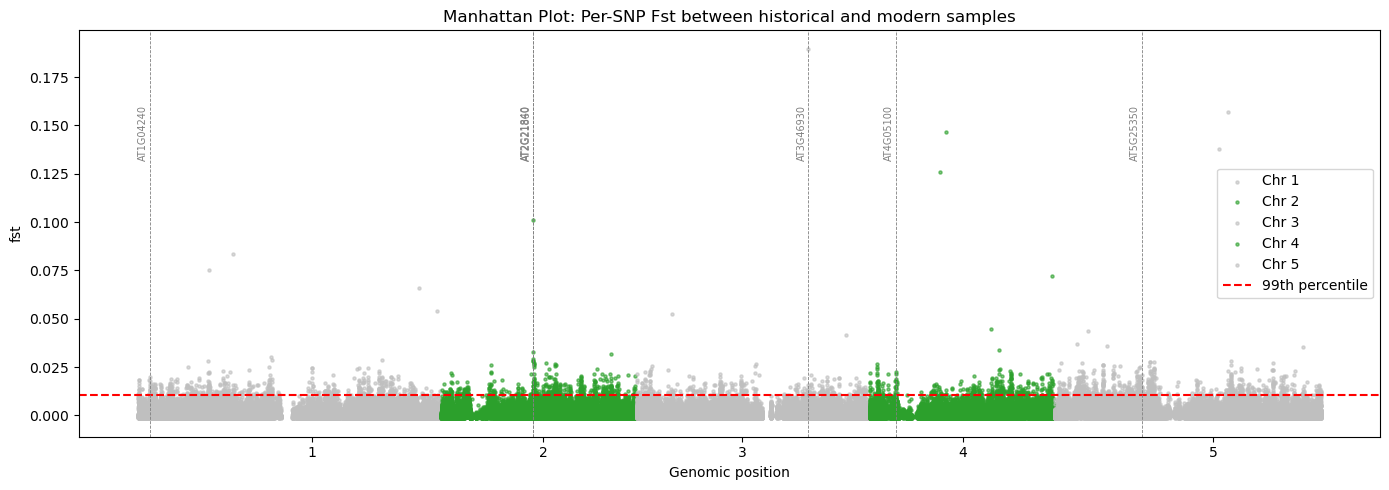

In [122]:
plt.figure(figsize=(14, 5))
colors = ['#bfbfbf', '#2ca02c']

for i, (chrom, group) in enumerate(df.groupby('chrom_numeric')):
    plt.scatter(group['pos_cum'], group['fst'], s=5, alpha=0.6, color=colors[i % 2], label=f'Chr {group.chrom.iloc[0]}')
plt.legend().remove() 
# Threshold line
threshold = np.nanpercentile(df['fst'], 99)
plt.axhline(threshold, color='red', linestyle='--', label='99th percentile')

# Chromosome ticks
xticks = df.groupby('chrom_numeric')['pos_cum'].median()
xtick_labels = df.groupby('chrom_numeric')['chrom'].first()

plt.xticks(ticks=xticks, labels=xtick_labels)
plt.xlabel('Genomic position')
plt.ylabel('fst')
plt.title('Manhattan Plot: Per-SNP Fst between historical and modern samples')
plt.legend()
plt.tight_layout()

# Draw grey vertical lines and add gene ID labels
for _, row in gene_df.iterrows():
    chrom = row['chrom']
    gene_start = row['start']
    gene_ends = row['end']
    gene_id = row['gene_id']

    filter_df = df[(df['chrom'] == chrom) & (df['pos']>=gene_start-10000) & (df['pos']<=gene_ends+10000)]
    gene_pos_cum = filter_df.sample(1)['pos_cum'].values[0]

    # Plot vertical line
    plt.axvline(gene_pos_cum, color='grey', linestyle='--', linewidth=0.6)

    # Add gene label
    plt.text(gene_pos_cum - 7e5, df['fst'].max() * 0.7, gene_id,
             rotation=90, 
             fontsize=7, color='grey', ha='center')

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


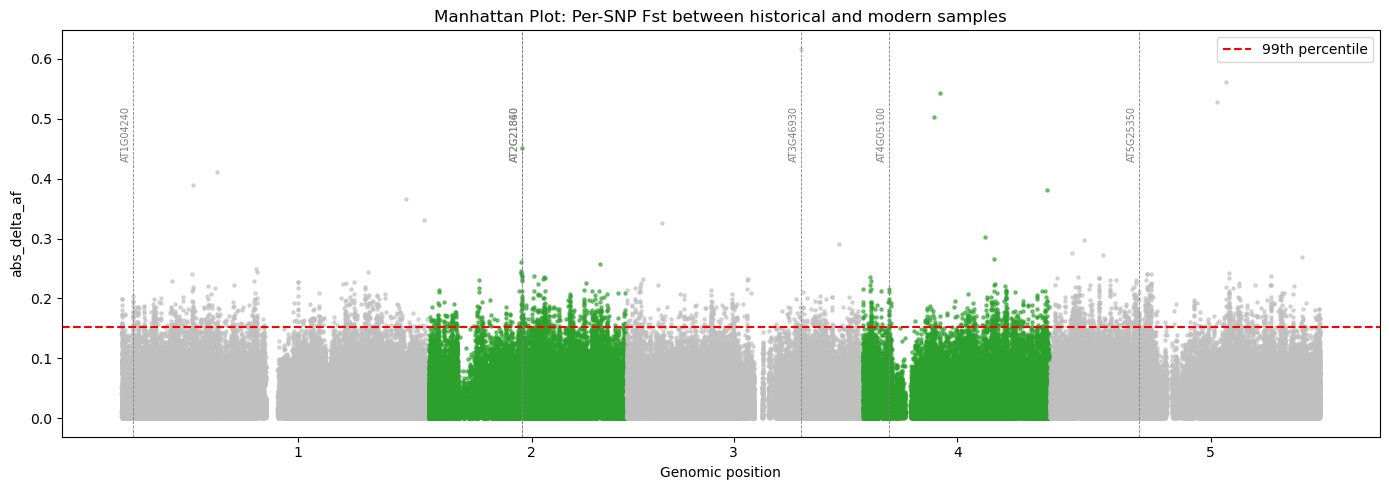

In [123]:
plt.figure(figsize=(14, 5))
colors = ['#bfbfbf', '#2ca02c']

for i, (chrom, group) in enumerate(df.groupby('chrom_numeric')):
    plt.scatter(group['pos_cum'], group['abs_delta_af'], s=5, alpha=0.6, color=colors[i % 2])
plt.legend().remove() 
# Threshold line
threshold = np.nanpercentile(df['abs_delta_af'], 99)
plt.axhline(threshold, color='red', linestyle='--', label='99th percentile')

# Chromosome ticks
xticks = df.groupby('chrom_numeric')['pos_cum'].median()
xtick_labels = df.groupby('chrom_numeric')['chrom'].first()

plt.xticks(ticks=xticks, labels=xtick_labels)
plt.xlabel('Genomic position')
plt.ylabel('abs_delta_af')
plt.title('Manhattan Plot: Per-SNP Fst between historical and modern samples')
plt.legend()
plt.tight_layout()


# Draw grey vertical lines and add gene ID labels
for _, row in gene_df.iterrows():
    chrom = row['chrom']
    gene_start = row['start']
    gene_ends = row['end']
    gene_id = row['gene_id']

    filter_df = df[(df['chrom'] == chrom) & (df['pos']>=gene_start-10000) & (df['pos']<=gene_ends+10000)]
    gene_pos_cum = filter_df.sample(1)['pos_cum'].values[0]

    # Plot vertical line
    plt.axvline(gene_pos_cum, color='grey', linestyle='--', linewidth=0.6)

    # Add gene label
    plt.text(gene_pos_cum - 7e5, df['abs_delta_af'].max() * 0.7, gene_id,
             rotation=90, 
             fontsize=7, color='grey', ha='center')


plt.show()


In [ ]:
# heterozigocity  He=2pq=2⋅p⋅(1−p)
he_hist = 2 * af_hist * (1 - af_hist)
he_mod = 2 * af_mod * (1 - af_mod)
delta_he = he_mod - he_hist

/tmp/ipykernel_1079232/3964557035.py:20: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/carnegie/hpcdata/software/conda/envs/python-3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


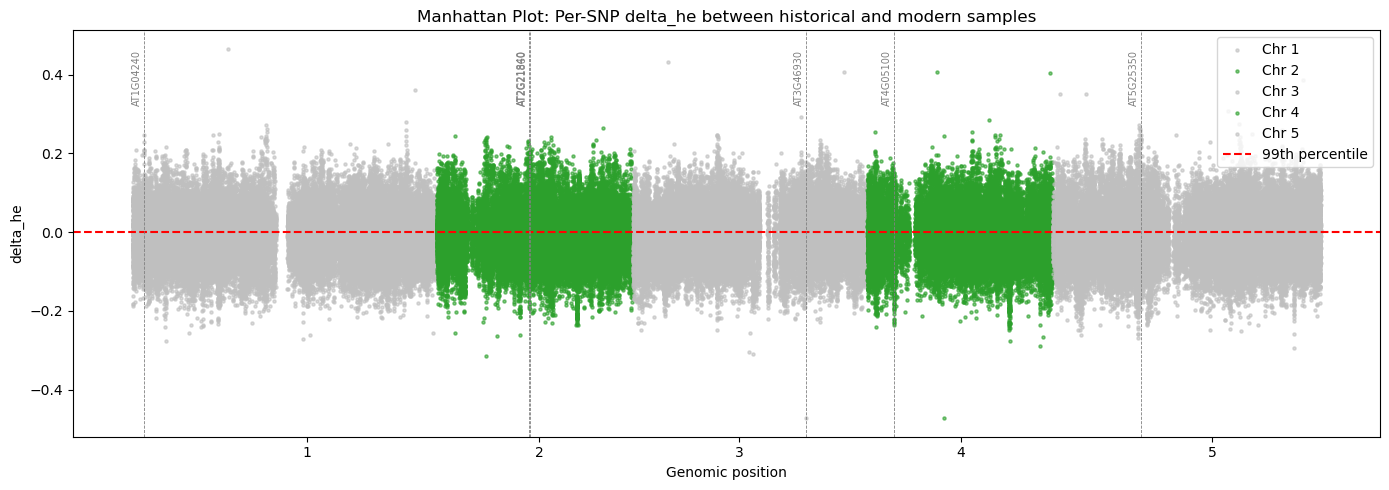

In [124]:
plt.figure(figsize=(14, 5))
colors = ['#bfbfbf', '#2ca02c']

for i, (chrom, group) in enumerate(df.groupby('chrom_numeric')):
    plt.scatter(group['pos_cum'], group['delta_he'], s=5, alpha=0.6, color=colors[i % 2], label=f'Chr {group.chrom.iloc[0]}')

# Threshold line

plt.axhline(0, color='red', linestyle='--', label='99th percentile')

# Chromosome ticks
xticks = df.groupby('chrom_numeric')['pos_cum'].median()
xtick_labels = df.groupby('chrom_numeric')['chrom'].first()

plt.xticks(ticks=xticks, labels=xtick_labels)
plt.xlabel('Genomic position')
plt.ylabel('delta_he')
plt.title('Manhattan Plot: Per-SNP delta_he between historical and modern samples')
plt.legend()
plt.tight_layout()

# Draw grey vertical lines and add gene ID labels
for _, row in gene_df.iterrows():
    chrom = row['chrom']
    gene_start = row['start']
    gene_ends = row['end']
    gene_id = row['gene_id']

    filter_df = df[(df['chrom'] == chrom) & (df['pos']>=gene_start-10000) & (df['pos']<=gene_ends+10000)]
    gene_pos_cum = filter_df.sample(1)['pos_cum'].values[0]

    # Plot vertical line
    plt.axvline(gene_pos_cum, color='grey', linestyle='--', linewidth=0.6)

    # Add gene label
    plt.text(gene_pos_cum - 7e5, df['delta_he'].max() * 0.7, gene_id,
             rotation=90, 
             fontsize=7, color='grey', ha='center')

plt.show()

In [94]:
import numpy as np
import pandas as pd

# 1. Ensure chromosome is string and create numeric codes
df_pi_all['chrom'] = df_pi_all['chrom'].astype(str)
df_pi_all['chrom_numeric'] = df_pi_all['chrom'].astype('category').cat.codes

# 2. Sort by chrom and window start
df_pi_all = df_pi_all.sort_values(['chrom_numeric', 'start'])

# 3. Compute max end per chromosome for offset
max_ends = df_pi_all.groupby('chrom_numeric')['end'].max()
offsets = max_ends.cumsum().shift(fill_value=0)
offset_dict = offsets.to_dict()

# 4. Add cumulative position column
df_pi_all['start_cum'] = df_pi_all['start'] + df_pi_all['chrom_numeric'].map(offset_dict)


In [106]:
df_pi_all['mean']  = (df_pi_all['start'] + df_pi_all['end'] )/2

In [101]:
gene_start

1128149

In [102]:
gene_ends

1129689

In [109]:
df_pi_all

start              int64
end                int64
chrom             object
pi_hist          float64
pi_mod           float64
delta_pi         float64
chrom_numeric       int8
start_cum          int64
mean             float64
dtype: object

In [111]:
df_pi_all[(df_pi_all['chrom'] == '1') & (df_pi_all['mean']>=gene_start-1000) & (df_pi_all['mean']<=gene_ends+1000)]

,start,end,chrom,pi_hist,pi_mod,delta_pi,chrom_numeric,start_cum,mean
22536,1127146,1127195,1,0.000000,0.00000,0.000000,0,1127146,1127170.5
22537,1127196,1127245,1,0.000000,0.00000,0.000000,0,1127196,1127220.5
22538,1127246,1127295,1,0.000000,0.00000,0.000000,0,1127246,1127270.5
22539,1127296,1127345,1,0.005136,0.00402,-0.001115,0,1127296,1127320.5
22540,1127346,1127395,1,0.000000,0.00000,0.000000,0,1127346,1127370.5
...,...,...,...,...,...,...,...,...,...
22602,1130446,1130495,1,0.000000,0.00000,0.000000,0,1130446,1130470.5
22603,1130496,1130545,1,0.000000,0.00000,0.000000,0,1130496,1130520.5
22604,1130546,1130595,1,0.000000,0.00000,0.000000,0,1130546,1130570.5
22605,1130596,1130645,1,0.000000,0.00000,0.000000,0,1130596,1130620.5


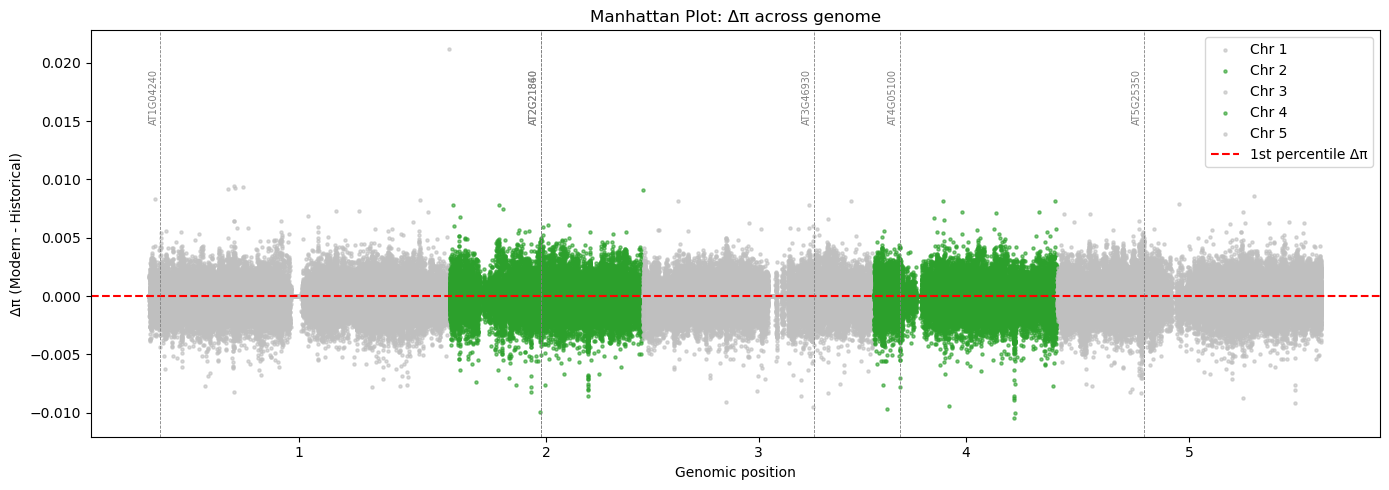

In [125]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
colors = ['#bfbfbf', '#2ca02c']

for i, (chrom, group) in enumerate(df_pi_all.groupby('chrom_numeric')):
    plt.scatter(group['start_cum'], group['delta_pi'], s=5, alpha=0.6,
                color=colors[i % 2], label=f'Chr {group.chrom.iloc[0]}')

# Optional threshold line
plt.axhline(0, color='red', linestyle='--', label='1st percentile Δπ')

# Chromosome tick labels
xticks = df_pi_all.groupby('chrom_numeric')['start_cum'].median()
xtick_labels = df_pi_all.groupby('chrom_numeric')['chrom'].first()

plt.xticks(ticks=xticks, labels=xtick_labels)
plt.xlabel('Genomic position')
plt.ylabel('Δπ (Modern - Historical)')
plt.title('Manhattan Plot: Δπ across genome')
plt.legend()
plt.tight_layout()

# Draw grey vertical lines and add gene ID labels
for _, row in gene_df.iterrows():
    chrom = str(row['chrom'])
    gene_start = row['start']
    gene_ends = row['end']
    gene_id = row['gene_id']

    filter_df = df_pi_all[(df_pi_all['chrom'] == chrom) & (df_pi_all['mean']>=gene_start-1000) & (df_pi_all['mean']<=gene_ends+1000)]
    gene_pos_cum = filter_df.sample(1)['start_cum'].values[0]

    # Plot vertical line
    plt.axvline(gene_pos_cum, color='grey', linestyle='--', linewidth=0.6)

    # Add gene label
    plt.text(gene_pos_cum - 7e5, df_pi_all['delta_pi'].max() * 0.7, gene_id,
             rotation=90, 
             fontsize=7, color='grey', ha='center')

plt.show()

In [116]:
zoom_df

,start,end,chrom,pi_hist,pi_mod,delta_pi,chrom_numeric,start_cum,mean
773078,8307043,8307092,2,0.001837,0.002040,0.000203,1,38725291,8307067.5
773079,8307093,8307142,2,0.000000,0.000000,0.000000,1,38725341,8307117.5
773080,8307143,8307192,2,0.000000,0.000000,0.000000,1,38725391,8307167.5
773081,8307193,8307242,2,0.005795,0.006653,0.000858,1,38725441,8307217.5
773082,8307243,8307292,2,0.000000,0.000000,0.000000,1,38725491,8307267.5
...,...,...,...,...,...,...,...,...,...
813333,10319793,10319842,2,0.000000,0.000000,0.000000,1,40738041,10319817.5
813334,10319843,10319892,2,0.000000,0.000000,0.000000,1,40738091,10319867.5
813335,10319893,10319942,2,0.000000,0.000000,0.000000,1,40738141,10319917.5
813336,10319943,10319992,2,0.000000,0.000000,0.000000,1,40738191,10319967.5
